# **Plotting and Visualization**
### 繪圖/視覺化

## **1. Matplotlib入門**

In [ ]:
# 先匯入所需要的套件
import matplotlib.pyplot as plt
import numpy as np  # 主要是用來生成資料來示範繪圖
# import pandas as pd

In [ ]:
# 透過幾行程式碼即可繪製簡單的圖表
data = np.arange(10) # 輸出0~9的一維陣列
print(data) # 查看data長什麼樣子
plt.plot(data)

### **1.1 Figures and Subplots 圖片畫板與子圖**
##### figure可以理解為作畫需要的畫板，畢竟你需要一張繪圖板才能作畫
##### Subplots子圖就是畫板上所做的畫，一張繪圖板其實可以透過劃分來畫很多圖

In [ ]:
# 開始用Matplotlib中的figure和subplot做圖

fig = plt.figure()  # 這段程式碼用來生成繪圖的畫板

sub1 = fig.add_subplot(2, 2, 1) # 使用fig.add_subplot(2, 2, 1)生成2*2個子圖，並選取第1個子圖來作畫，且這個子圖會儲存在sub1這個變數中
# np.random.randn(100)表示隨機生成100個常態分配的亂數
sub1.hist(np.random.randn(100), bins=25, color='k', alpha=0.3) #　.hist表示要畫直方圖，其中參數有bin：柱子數量、alpha：透明度(範圍從0~1，數字越小越透明)


sub2 = fig.add_subplot(2, 2, 2)  #  選取第2個子圖來作畫
sub2.scatter(x = np.arange(30), y = np.arange(30) + 3 * np.random.randn(30)) #  .scatter表示為散佈圖，其中參數有x：X軸數值的list、y：Y軸數值的list
# np.arange(30)：[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
# y軸數值有另外加上3倍的np.random.randn(30)


sub3 = fig.add_subplot(2, 2, 3)  #  選取第3個子圖來作畫
sub3.plot(np.random.randn(50).cumsum(), 'k--')  #  一般折線圖(.cumsum()表示它是累加、累計的)，'k--'相關參數後面後再詳細說明

In [ ]:
#  不斷的創建新的 figure 實例，很容易造成記憶體洩漏，而應合理的複用，能大大的提高運行速度。
#  關閉視窗，你需要把畫板上的畫擦掉才能畫下一張，不然白板上可能還會有殘留
#  此外,figure 的重複利用能大大節約時間，但是 matplotlib 維護的 figure 有數量上限（RuntimeWarning: More than 20 figures have been opened.）。
#  此外，在某些情況下，不清理 figure 將有可能造成在第一幅中 plot 的線再次出現在第二幅圖中。

# 以上這些說明可以自己研究一下，總之就是當繪圖告一個段落時可以執行這個，用來清理記憶體以避免出問題！
plt.close('all')

#### **1.1.1 Axes 和 Subplot 概念上細微的區別(略)**

---


##### 兩種繪圖方式的差異，但主要還是會用subplot作圖，axes不常用
##### 好記一點的理解：subplot可以理解成自動排列的桌面圖標，而axes則是可以隨意排列且可重疊的桌面圖標（可以圖上加圖，涉及軸域概念）
##### axes即為axis(軸；軸線)的複數型態

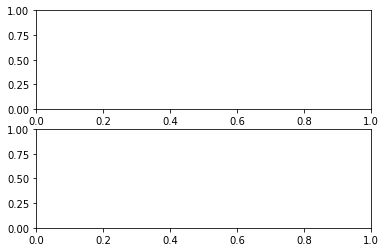

In [ ]:
# 主要會用Subplot做圖
fig = plt.figure()
fig.add_subplot(2,1,1)  #將白板劃分為2個row,1個column的2x1子圖,並畫出第1個
fig.add_subplot(2,1,2)  #畫出第2個

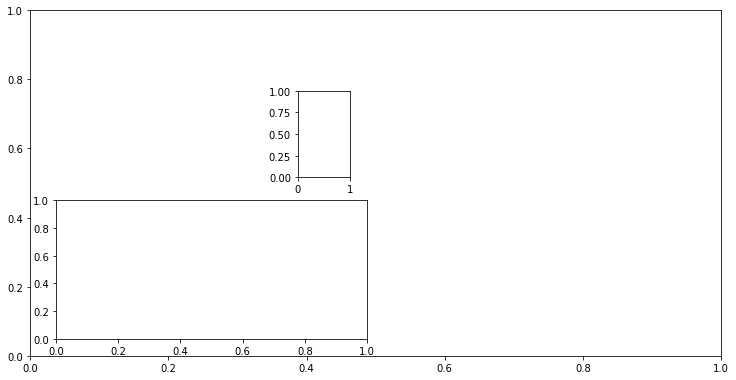

In [ ]:
# 不太會用axes做圖，參考一下就好
fig = plt.figure()
fig.add_axes([0.1,0.1,1.6,1.2])     # axes產生的圖形是以左下角坐標進行定位，(0.1,0.1)固定左下角坐標，(1.6,1.2)則是設定寬度和長度,完成製圖
fig.add_axes([0.16,0.16,0.72,0.48])
fig.add_axes([0.72,0.72,0.12,0.3])  

#### **1.1.2 Adjusting the spacing around subplots 調整子圖周圍的距離**

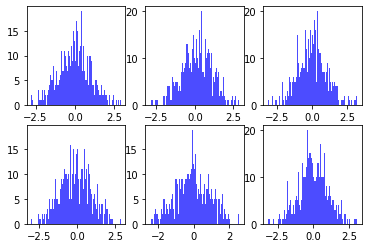

In [ ]:
# # 使用fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)

# #                 wspace = 0.2   # 子圖水平間距
# #                 hspace = 0.2   # 子圖垂直間距
# #                 left  = 0.125  # 子圖(subplot)距畫板(figure)左邊的距離
# #                 right = 0.9    # 子圖(subplot)距畫板(figure)右邊的距離
# #                 bottom = 0.1   # 子圖(subplot)距畫板(figure)底部的距離
# #                 top = 0.9      # 子圖(subplot)距畫板(figure)頂部的距離



# 再來開始講解參數調整或設定的部分，先稍微講一個函數：
# 使用plt.subplots() 函數則有 fig = plt.figure() + axes = fig.add_subplot(x, y, z) 的雙重功能
fig, axes = plt.subplots(2, 3, sharex=False, sharey=False) #  建立2x3個的子圖，所有子圖要儲存在axes這個子圖矩陣裡面，畫板則存在fig當中
#  若sharex=False、sharey=False表示每個子圖會有各自的x、y刻度，設置True則表示共用刻度

### [X X X] ###
### [X X X] ###

# 用迴圈將子圖個別做畫
for i in range(2): # row [0,1]
    for j in range(3): # column [0,1,2]
        axes[i, j].hist(np.random.randn(500), bins=100, color='b', alpha=0.7) # 直條圖

# 使用fig.subplots_adjust()整體調整axes子圖周圍的距離，通常只設定wspace跟hspace，其他的就給大家參考
fig.subplots_adjust(wspace=0.2, hspace=0.2)


# PS. plt.subplots()雖然很方便，但是必須要很熟悉fig = plt.figure() 和 fig.add_subplot()，再去使用比較好

############################################################################################################################################

### **1.2 Colors, Markers, and Line Styles**
#### **顏色,標記和線類型**

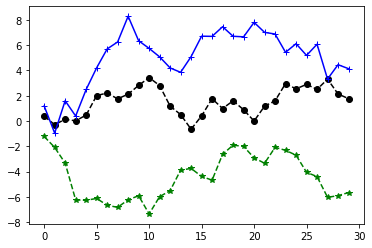

In [ ]:
# 調整顏色、標記、線圖類型
fig = plt.figure()  # 若是透過子圖的作法，這段程式碼則必要
ax = fig.add_subplot(1, 1, 1) # 代表畫板只畫一張圖而已
ax.plot(np.random.randn(30).cumsum(), color='k', marker='o', linestyle='dashed')  # 具體的寫法，黑色點標記虛線圖
ax.plot(np.random.randn(30).cumsum(), 'g*--')  # 偷懶的寫法，g:green  *:星號標記  --:虛線圖
ax.plot(np.random.randn(30).cumsum(), 'b+-')  # b:blue  +:加號標記  -:實線圖(預設值)
# 參數值可參考：https://blog.csdn.net/sinat_36219858/article/details/79800460

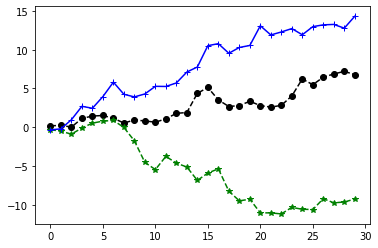

In [ ]:
# 調整顏色、標記、線圖類型
fig = plt.figure() # 若不透過子圖的作法，則這段程式碼可有可無；但如果要儲存圖表的畫，這段程式碼是必須的
plt.plot(np.random.randn(30).cumsum(), color='k', marker='o', linestyle='dashed')  # 具體的寫法，黑色點標記虛線圖
plt.plot(np.random.randn(30).cumsum(), 'g*--')  # 偷懶的寫法，g:green  *:星號標記  --:虛線圖
plt.plot(np.random.randn(30).cumsum(), 'b+-')  # b:blue  +:加號標記  -:實線圖(預設值)
# 參數值可參考：https://blog.csdn.net/sinat_36219858/article/details/79800460

In [ ]:
plt.close('all')

### **1.3 Ticks, Labels, and Legends**
#### **刻度、標籤和圖例**

#### **1.3.1 Setting the title, axis labels, ticks, and ticklabels**
##### 設置標題、軸標籤、刻度以及刻度標籤

Text(0, 0.5, '$$$')

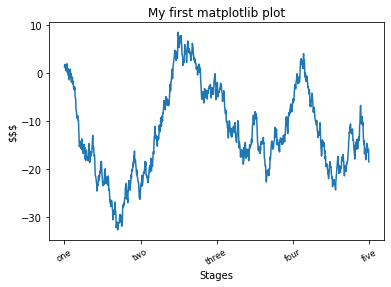

In [ ]:
### 透過子圖的作法

# 設置圖標題、軸標籤、刻度、刻度標籤
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1) # 代表畫板只畫一張圖而已
ax.plot(np.random.randn(1000).cumsum())  # 隨機生成1000個標準常態的隨機亂數，然後它是累加性的

ax.set_xticks([0, 250, 500, 750, 1000])  # set_xticks設置刻度
ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'], rotation=30, fontsize='small') # set_xticklabels設置刻度標籤，其中rotation參數表示為旋轉角度
ax.set_title('My first matplotlib plot')  # 設置圖標題
ax.set_xlabel('Stages')  # 設置x軸標題
ax.set_ylabel('$$$')  # 設置y軸標題

Text(0, 0.5, '$$$')

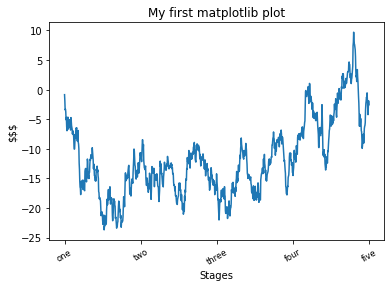

In [ ]:
###### Appendix ######
### 不透過子圖的作法

# 設置圖標題、軸標籤、刻度、刻度標籤
fig = plt.figure()
plt.plot(np.random.randn(1000).cumsum())  # 隨機生成1000個標準常態的隨機亂數，然後它是累加性的

plt.xticks([0, 250, 500, 750, 1000],['one', 'two', 'three', 'four', 'five'], rotation=30, fontsize='small')  # xticks設置刻度刻度標籤
plt.title('My first matplotlib plot')  # 設置圖標題
plt.xlabel('Stages')  # 設置x軸標題
plt.ylabel('$$$')  # 設置y軸標題

[[<matplotlib.axis.XTick at 0x7fdcfc365320>,
 [Text(0, 0, 'one'),
  Text(0, 0, 'two'),
  Text(0, 0, 'three'),
  Text(0, 0, 'four'),
  Text(0, 0, 'five')],
 Text(0.5, 0, 'Stages')]

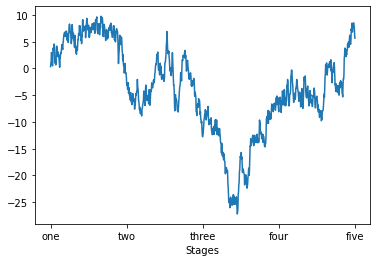

In [ ]:
# 更改設置標題、軸標籤、刻度、刻度標籤的另一種方式，稍微困難就僅參考一下即可
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum())

attrs = {  # 利用dict方式儲存要設置的參數
    'xlabel': 'Stages',
    'xticks': [0, 250, 500, 750, 1000],
    'xticklabels':['one', 'two', 'three', 'four', 'five'], # 這裡就不能使用rotation、fontsize的額外參數設定

}

ax.set(**attrs)  # 使用set統一來做調整，**表示將所要設置的多個參數放入字典中（*表示將調用的多個參數放入元組中）

In [ ]:
plt.close('all')

#### **1.3.2 如何添加中文標籤(略)**
#####各自的電腦不同，這裡必須要更改自己電腦的內部系統設定，才能有中文效果，由於會很複雜而且會有風險，因此這部份會略過，有興趣更改的同學可以自行研究，
####寫程式仍是以英文為主

In [ ]:
from matplotlib.font_manager import FontProperties
# plt.rcParams['font.sans-serif'] = ['FangSong'] # 指定預設字體
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 
plt.rcParams['axes.unicode_minus'] = False # 解決保存圖像是負號'-'顯示為方塊的問題
# 在使用中文時要加上字符u。如：plt.title(u'這裡寫的是中文')

[Text(0.5, 0, 'Stages'), Text(0.5, 1.0, '我的第一次圖表 ')]

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 25105 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 30340 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 31532 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 19968 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 27425 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_a

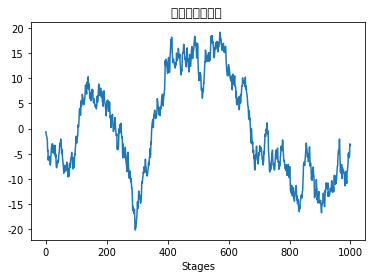

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum())
props = {
    'title': '我的第一次圖表 ',
    'xlabel': 'Stages'
}
ax.set(**props)

#### **1.3.3 Adding legends  增加圖例**


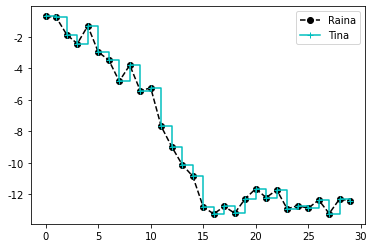

In [ ]:
# 增加圖例(透過子圖的做法)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
data = np.random.randn(30).cumsum()
# 透過label參數來下圖例名稱
ax.plot(data, 'ko--', label='Raina')  # 虛線的折線圖，圖例名稱為"Raina"
ax.plot(data, 'c+-', drawstyle='steps-post', label='Tina') # 實線的階梯線圖(參考即可)，圖例名稱為"Tina"
# 印刷四分色 －> C：Cyan ＝ 青色、M：Magenta ＝ 洋紅色、Y：Yellow ＝ 黃色、K：Black ＝ 黑色
# 參考資訊：https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.plot.html

ax.legend(loc='best')   # 使用legend增加圖例，loc='best'表示由系統自動判斷最佳位置
# plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=True, ncol=2)  # 參考即可
## loc：位置；bbox_to_anchor：相對於軸的位置；fancybox：是否啟用圓角，分幾個column顯示
## legend相關參數：https://blog.csdn.net/helunqu2017/article/details/78641290

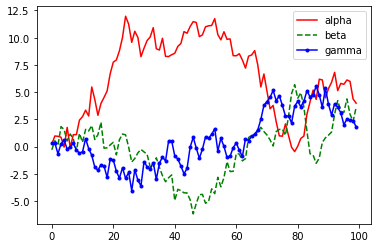

In [ ]:
###### Appendix ######
# 增加圖例(不透過子圖的做法)
fig = plt.figure()
plt.plot(np.random.randn(100).cumsum(), 'r-', label='alpha')
plt.plot(np.random.randn(100).cumsum(), 'g--', label='beta')
plt.plot(np.random.randn(100).cumsum(), 'b.-', label='gamma')
plt.legend(loc='best')
# plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=True, ncol=2)  # 參考即可
## loc：位置；bbox_to_anchor：相對於軸的位置；fancybox：是否啟用圓角，分幾個column顯示
## legend相關參數：https://blog.csdn.net/helunqu2017/article/details/78641290

In [ ]:
plt.close('all')

### **1.4 Annotations and Drawing on a complete Subplot (Appendix)**
#### **註解以及在Subplot上繪圖，稍複雜，因此放在附錄**
#### 此例需搭配使用上午場所講的pandas套件

In [ ]:
# 在特定的線點地方設置註解
# 實例：目標是根據標準普爾500指數(spx index)價格繪製一張折線圖，並註解出2008~2009金融危機期間時所發生的重大的事
from datetime import datetime # 由於會使用時間資料，所以要匯入datetime套件與函數
import pandas as pd  # 匯入csv資料所需
import matplotlib.pyplot as plt

# 要透過Colab上傳csv檔，所需要一些的套件與方法
from google.colab import files
import io
uploaded = files.upload()  # 會出現上傳檔案畫面
# 透過pandas匯入csv檔的資料，index_col表示要把索引設定在第幾欄，parse_dates則表示是否要解析時間(成時間序列)
data = pd.read_csv(io.BytesIO(uploaded['spx.csv']), index_col=0, parse_dates=True)

Saving spx.csv to spx.csv


In [ ]:
data # 查看我們的data長什麼樣子

,SPX
1990-02-01,328.79
1990-02-02,330.92
1990-02-05,331.85
1990-02-06,329.66
1990-02-07,333.75
...,...
2011-10-10,1194.89
2011-10-11,1195.54
2011-10-12,1207.25
2011-10-13,1203.66


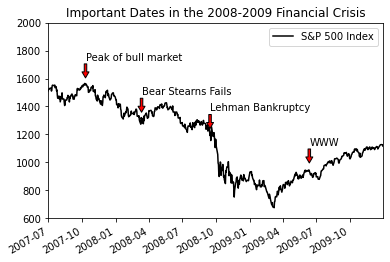

In [ ]:
# 正式開始作圖
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
spx = data['SPX']  # 額外將指數SPX價格資料(y)獨立出來

# Plotting with Pandas
spx.plot(ax=ax, style='k-',label='S&P 500 Index')  #  ax參數則是選擇要在哪張子圖上畫。前者ax是參數名稱，後者ax則是參數值(子圖)，因為子圖只有一張，所以ax=ax


# 透過list儲存金融危機期間時所發生的重大的事，裡面個別項目則是以tuple儲存
crisis_data = [     # 用datetime函數轉換成日期格式，觀察它的資料結構，這一個list中含有多個tuple，而每1個tuple各有2個值
    (datetime(2007, 10, 11), 'Peak of bull market'), # 牛市高峰
    (datetime(2008,  3, 12), 'Bear Stearns Fails'), # 貝爾斯登破產
    (datetime(2008,  9, 15), 'Lehman Bankruptcy'), # 雷曼兄弟破產
    (datetime(2009,  6, 13), 'WWW') # 隨意自創ㄉ
]


# 使用迴圈，講每個時間點一個一個加註解annotate到圖上，並且加上箭頭標示線點地方，date就是日期(x)，label表示要註解的文字
for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 50),  # label表示註解的文字，xy：箭頭尖點的坐標點(y座標+50)，asof：透過日期(x值)來尋找SPX(y值)，如同f(x)=y的概念
                xytext=(date, spx.asof(date) + 200),  # xytext：註解文字的坐標點(y座標+200)
                arrowprops=dict(facecolor='red', headwidth=7, width=2.5, headlength=6),  # 箭頭參數
                horizontalalignment='left', verticalalignment='center')  # 註解文字的對齊方式(參考即可)
                #  horizontalalignment可調整'center', 'right', 'left'；verticalalignment可調整'top', 'bottom', 'center', 'baseline', 'center_baseline'
# annotate(註解)的參數說明可參考：https://blog.csdn.net/helunqu2017/article/details/78659490



# Zoom in on 2007-2009，可以自調時間(x)範圍
ax.set_xlim(['7/1/2007', '12/31/2009'])  # 設置x軸時間的範圍限制(記得需考量到上面金融危機時間點)
ax.set_ylim([600, 2000])# 設置y軸spx的範圍限制
ax.set_title('Important Dates in the 2008-2009 Financial Crisis')
ax.legend(loc="best")

# 這張圖中有幾個重要的點要強調：ax.annotate方法可以在指定的x和y坐標軸繪製標籤。我們使用set_xlim和set_ylim人工設定起始和結束邊界，
# 而不使用matplotlib的預設方法。最後，用ax.set_title添加圖示標題。

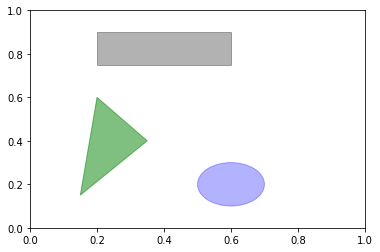

In [ ]:
# 可以通過add_patch函數添加matplotlib一些常見圖形，不常用所以大家參考一下即可
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3) # (0.2, 0.75)為左下角的座標，0.4, 0.15為寬度與長度
circ = plt.Circle((0.6, 0.2), 0.1, color='b', alpha=0.3)  # (0.6, 0.2)為中心點座標，0.1為r
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]], color='g', alpha=0.5)  # 三點座標

ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

### **1.5 Saving Plots to File  將圖表儲存在電腦裡面**

In [ ]:
fig.savefig('figpath.png', dpi=1200, bbox_inches='tight') # 儲存圖表，bbox_inches設置為tight，表示會去除圖表周圍的空白或多餘部分 -> 節省大小空間

# 要透過Colab下載圖片檔，所需要的程式
from google.colab import files
files.download("figpath.png")

############################################################################################################################################

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
plt.close('all')

### **Appendix**

In [ ]:
# coding: utf-8
import matplotlib.pyplot as plt
import numpy as np
# from PIL import Image
# import pylab

# 有時候調整參數時會有一個習慣：另外宣告各個參數變數，之後若要調整參數就可以統一在這裡操作，不用在下面複雜的程式碼中裡面調整
font_size = 15 # 字體大小
fig_size = (10,8) # 畫板大小
names = ('Tily', 'Wina','Break') # 姓名tuple
subjects = ('English', 'Marketing', 'Python', 'HRM') # 學科tuple
scores = ((70, 95, 90, 61),
          (92, 95, 70, 58),
          (81, 84, 80, 70)) # 成績tuple
 
bar_width = 0.25   # 設置直條圖寬度
index = np.arange(len(scores[0])) # 設置索引值
print(index) # 可以先記住：這些index代表x軸的座標值(0、1、2、3)，並會從第一學科區段的第一長條的左下角開始為原點

[0 1 2 3]


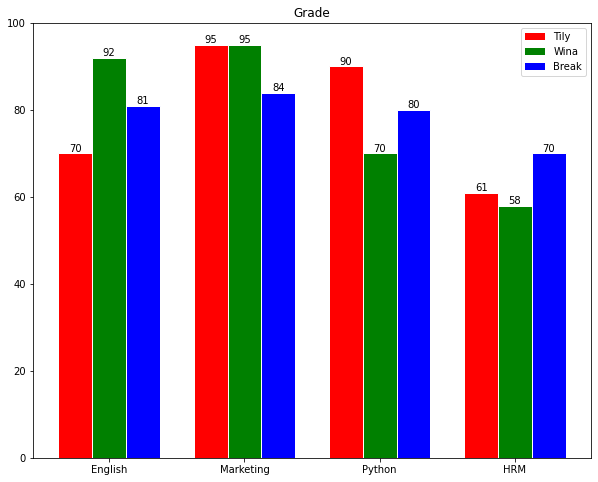

In [ ]:
plt.figure(figsize=fig_size) # 調整畫板的大小，參考一下可即可

# 繪製“Tinna”的成績長條，並儲存在一個變數    plt.bar(x,y,width,color(facecolor,edgecolor),label)
rects1 = plt.bar(index, scores[0], bar_width, color='r', label=names[0]) # rects1為Tinna的長條
# 繪製“Wily”的成績長條，並儲存在一個變數
rects2 = plt.bar(index + bar_width, scores[1], bar_width, color='g', label=names[1]) # rects2為Wily的長條，index + bar_width就不會跟Tinna的重疊在一起
# 繪製“Wina”的成績長條，並儲存在一個變數
rects3 = plt.bar(index + 2*bar_width, scores[2], bar_width, color='b', label=names[2]) # rects3為Wily的長條，index + 2*bar_width就不會跟Tinna、Wily的重疊在一起


plt.xticks(index + bar_width, subjects)  # 設置X軸刻度標籤的位置
plt.ylim(ymax=100, ymin=0)  # Y軸範圍
plt.title('Grade')  # 圖表標題
plt.legend(loc='best')



# 添加資料標籤，就是矩形上面的成績數字
def add_labels(rects):
    for rect in rects:
        height = rect.get_height() # 也就是成績分數(y座標值)
        plt.text(rect.get_x() + rect.get_width() / 2, height, height, ha='center', va='bottom')  
        # plt.text(x座標, y座標, text, ha位置, va位置)
        # rect.get_x()表示取rect左下角的x座標值，rect.get_width()則是取寬度(即為bar_width)
        # ha='right'點在注釋右邊（可調整為right,center,left），va='bottom'點在注釋底部(可調整為'top', 'bottom', 'center', 'baseline')
        # horizontal(vertical) alignment='center' 
        rect.set_edgecolor('white') # 直條圖邊緣用白色填充，為了更加清晰可分辨
        # print(rect.get_x())

add_labels(rects1)
add_labels(rects2)
add_labels(rects3)


# plt.savefig('scores_par.png')   # 圖表輸出到本地
# pylab.show('scores_par.png')    # 並列印顯示圖片

## **2. Plotting with pandas**
### 直接使用pandas來繪圖
##### matplotlib是一個具有高自由度的繪圖工具，但pandas本身也具有一些快速生成圖形的函數方法
##### 但若渴望有更加更好的視覺化效果，使用matplotlib+seaborn仍是首選
https://pandas.pydata.org/pandas-docs/version/0.19.1/generated/pandas.DataFrame.plot.html

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### **2.1 Line Plots 折線圖**

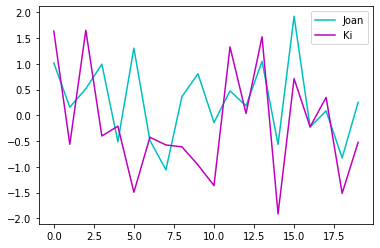

In [ ]:
# 隨意透過pandas生成一維的資料
s = pd.Series(np.random.randn(20), index = np.arange(0, 20, 1))  # 隨機生成20個的標準化常態分配亂數
t = pd.Series(np.random.randn(20), index = np.arange(0, 20, 1))  # 隨機生成20個的標準化常態分配亂數

print(s)
print(t)
s.plot(style='c-',label='Joan', legend = True) # 圖例會系統自動放在最佳位置
t.plot(style='m-',label='Ki', legend = True)

        Tim       Lun     Willy        Jo
0  0.164865  0.305220  0.532958  0.326248
1  1.346484  1.361317 -0.516811  0.001503
2  1.231889 -0.062431 -0.743389  0.321078
3  1.979235 -0.591204 -0.571451  0.003798
4 -1.463353 -0.679306 -1.573313  1.585772
5 -0.198638  0.418931  0.778498 -0.317812
6  0.508942  0.389209 -0.362161  0.912281
7 -0.441523 -0.315161 -0.692546  0.486302
8 -0.745276  1.163565 -0.189318 -0.707233
9  0.024771 -1.097021 -1.367266  2.119913


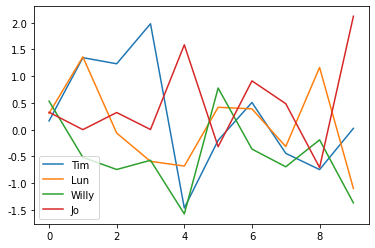

In [ ]:
# 隨意透過pandas生成二維的資料
df = pd.DataFrame(np.random.randn(10, 4),  # 隨機生成10x4標準常態分配的亂數矩陣
                  columns=['Tim', 'Lun', 'Willy', 'Jo'],
                  index=np.arange(0, 10, 1),)
print(df)
df.plot() # 一切參數都按照預設值，此時的圖例會自動幫你/妳加

#########################################################################################################

### **2.2 Bar Plots 柱狀圖/長條圖**

['a', 'b', 'c', 'd', 'e', 'f', 'g']


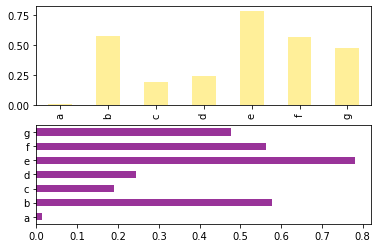

In [ ]:
fig, axes = plt.subplots(2, 1)  # 快速函數：開畫板、劃分成2x1個子圖

# np.random.rand(7)可視為隨機生成7個0~1數值之間的亂數
data = pd.Series(np.random.rand(7), index=list('abcdefg')) # 使用list的內建函數將字串一一劃分開來('a'、'b'、'c'、......)
print(list('abcdefg'))

data.plot.bar(ax=axes[0], color='gold', alpha=0.4)  # 直向柱狀圖，ax參數表示要使用哪個子圖作為繪圖對象
data.plot.barh(ax=axes[1], color='purple', alpha=0.8)  # 橫向柱狀圖

SSTTWW     Annie  Angeline     Howie       Din
1       0.207377  0.682578  0.083399  0.019132
2       0.044602  0.022273  0.767012  0.212382
3       0.359445  0.019074  0.702193  0.844751
4       0.276810  0.244122  0.493398  0.980963
5       0.565772  0.396634  0.297533  0.530361
6       0.533947  0.739453  0.813032  0.670612


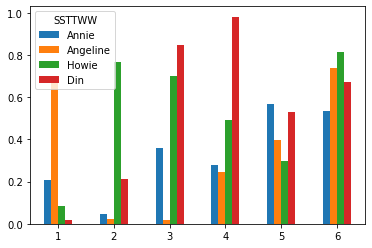

In [ ]:
# 搭配上午場的
np.random.seed(420613) # 固定某個seed，之後每次使用這個random函數，生成的結果都會是固定的數值(有這個概念就好)

df = pd.DataFrame(np.random.rand(6, 4),   #  rand從[0, 1)中返回隨機樣本，randn從標準常態分佈中返回隨機樣本
                  columns=pd.Index(['Annie', 'Angeline', 'Howie', 'Din'], name='SSTTWW'),
                  index=['1', '2', '3', '4', '5', '6'])
print(df)
df.plot.bar(rot=0)  # rot=0可把x軸的標籤轉正
# df.plot.bar()相關參數：https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.bar.html

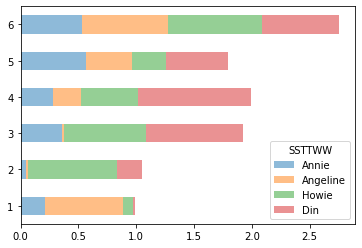

In [ ]:
df.plot.barh(stacked=True, alpha=0.5)  # stacked=True堆積柱狀圖

In [ ]:
plt.close('all')

## **3. Seaborn入門**
##### 是一種基於matplotlib的圖形視覺化python library。
##### 它提供了一種高度互動式介面，便於使用者能夠做出各種有吸引力的統計圖表。 Seaborn其實是在matplotlib的基礎上進行了更高級的API封裝，
##### 從而使得作圖更加容易，在大多數情況下使用seaborn就能做出很具有吸引力的圖，而使用matplotlib就能製作具有更多特色的圖。
##### 應該把Seaborn視為matplotlib的補充，而不是替代物。掌握seaborn能很大程度幫助我們更高效的觀察資料與圖表，並且更加深入瞭解它們。

##### * **簡單來說，Seaborn提供更高層次的API，可以讓你在不需要瞭解那麼多底層參數的情況下，同樣能夠畫出比較有吸引力的圖表** *

In [ ]:
import numpy as np
# import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
# 生成內嵌圖像，簡單來說就是不需要plt.show()就可以輸出圖像

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### **3.1 圖像美化**

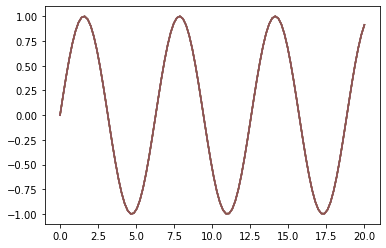

In [ ]:
# 沒有武裝Seaborn的Matplotlib
def sinplot(): # 畫出三角函數sin的圖
    x = np.linspace(0, 20, 100)  #返回均勻區隔的的數值
    # print(x)
    for i in range(1, 7):
        plt.plot(x, np.sin(x))  # 使用matplotlib作圖
sinplot()

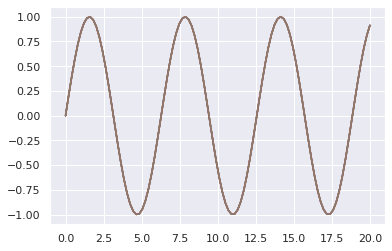

In [ ]:
# 有武裝Seaborn的Matplotlib
sns.set() # 把seaborn武裝在matplotlib上
sinplot() # 經過seaborn的美化

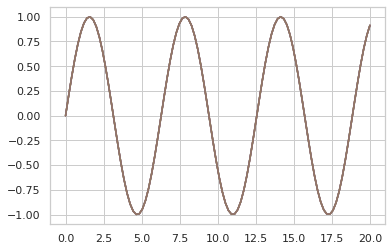

In [ ]:
sns.set_style('whitegrid') # seaborn預設主題一共五種，darkgrid、whitegrid、dark、white、ticks，利用set_style()來修改，不過這個修改是全域性的，會影響後面所有的圖像。
sinplot()

### **3.2 統計視覺化函數**
####由於這些部份都需要有進階統計學方面的知識，因此這裡只會講解**分類散佈圖&分類分佈圖**以及**記數直方圖**，剩下的會放在Appendix
####參考資訊：https://www.bookstack.cn/books/seaborn-0.9
1. 單變數分佈視覺化(displot)
2. 多變量分佈視覺化(jointplot)
3. 資料集中成對雙變數分佈(pairplot)
4. 雙變數-三變數散佈圖(relplot)
**5. 分類散佈圖&分類分佈圖**
6. 線性模型
**7. 記數直方圖**

### **3.3 單變量分佈**
##### 單變數分佈視覺化是通過將單變數資料進行統計從而實現畫出概率分佈的功能，同時概率分佈有**直方圖**與**概率分佈曲線**兩種形式。
##### 利用displot()對單變數分佈畫出長條圖(可以取消)，並自動進行概率分佈的擬合(也可以使用參數取消)。
#### 首先講單變量分布，很簡單就是做單變數的分析，使用displot()可以畫出機率分布曲線以及長條圖

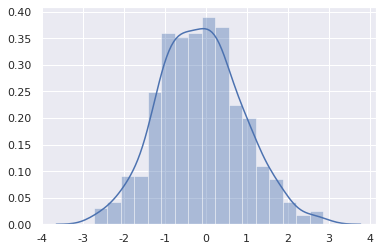

In [ ]:
sns.set_style('darkgrid')

x = np.random.randn(500)
sns.distplot(x)  #  y軸表示密度(density)，直方圖表示值的分布情況

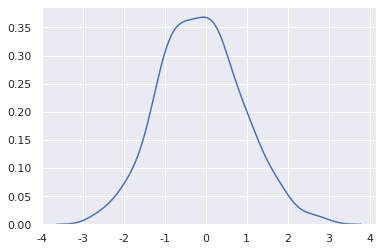

In [ ]:
sns.distplot(x,hist = False)

### **3.4 多變量分佈**
##### 多變數分佈通俗來說就是分析兩個變數的聯合概率分佈和每一個變數的分佈。
####  第2個是多變量，顧名思義就是分析兩個以上的變數

            x         y
0    0.764418  0.448580
1    0.563483  0.860988
2    0.583717  1.658274
3    0.488444  0.350382
4    0.776256  1.502566
..        ...       ...
495  0.286214  1.124784
496 -0.038575  0.533218
497  0.635254  1.908958
498  1.328527  1.013429
499  0.063378  0.169140

[500 rows x 2 columns]


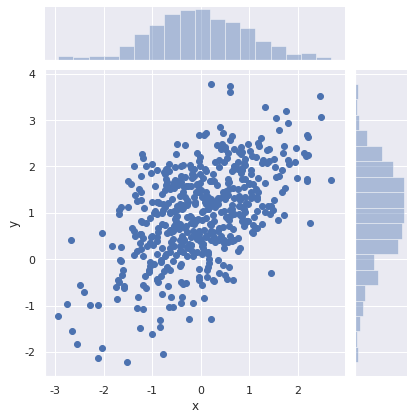

In [ ]:
import pandas as pd
mean, cov = [0, 1], [(1, .5),
                     (.5, 1)]  #  設定x跟y的平均數與共變異數對角矩陣(統計學的部份同學可以自行去研究一下)
data = np.random.multivariate_normal(mean, cov, 500)   #  np.random.multivariate_normal()  隨機生成多變量標準常態分佈矩陣
# np.random.multivariate_normal()的相關資料：https://www.twblogs.net/a/5c95fbe1bd9eee4a0d090dfd
df = pd.DataFrame(data, columns=["x", "y"])
print(df)
sns.jointplot(x="x", y="y", data=df)

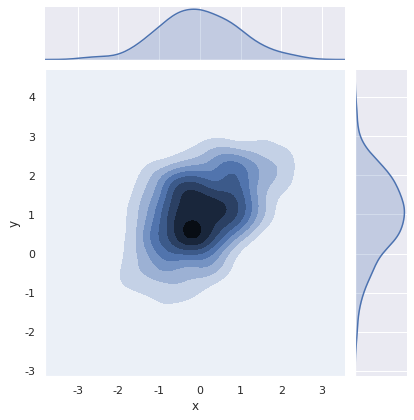

In [ ]:
sns.jointplot(x="x", y="y", data=df, kind="kde")  # 同樣可以使用曲線來擬合分佈密度(kde表示為密度圖)

### **3.5 資料集中成對雙變數分析**
##### 對於資料集有多個變數的情況，如果每一對都要畫出相關關係可能會比較麻煩，利用Seaborn可以很簡單的畫出資料集中每個變數之間的關係
####第3個是資料集中成對雙變數分析，當資料集有多個變數的情況下，可以利用pairplot()輕鬆畫出每個變數之間的關係

     sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]


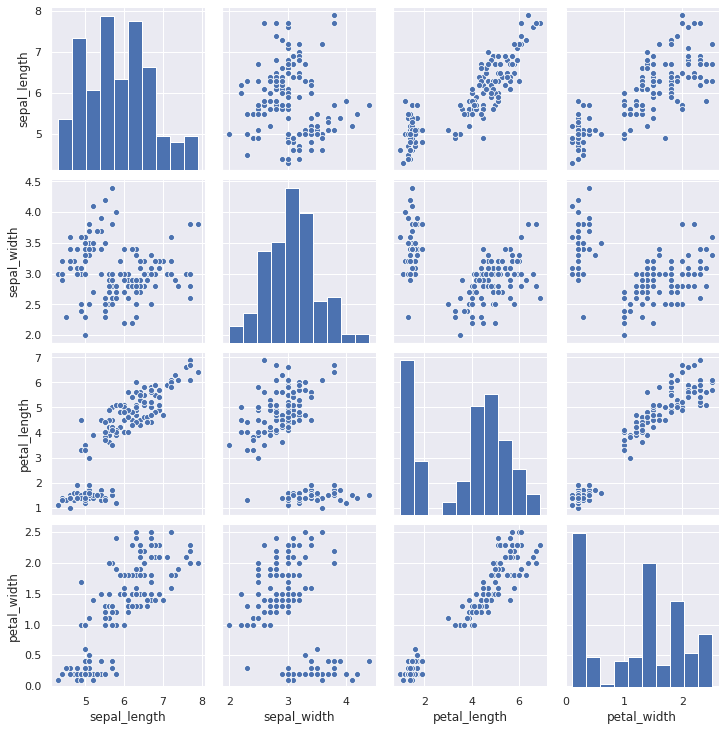

In [ ]:
iris = sns.load_dataset("iris")  # 鳶尾花的數據集
print(iris)
sns.pairplot(iris);
# 對角線化是單變量的分佈

### **3.6 雙變數-三變數散點圖**
##### 統計分析是瞭解資料集中的變數如何相互關聯以及這些關係如何依賴於其他變數的過程，有時候在對資料集完全不瞭解的情況下，
##### 可以利用散點圖和連線圖對其進行視覺化分析，這裡主要用到的函數是relplot函數。
####第4個是雙變數-三變數散佈圖，若對資料集完全不了解的情況下，可以利用relplot()畫出散佈圖來釐清變數的相互關係或依賴關係

     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]


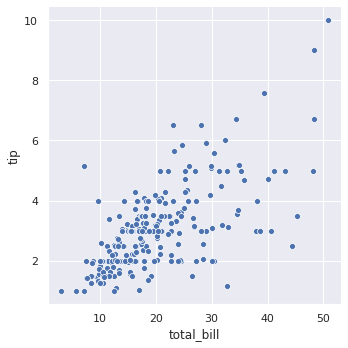

In [ ]:
tips = sns.load_dataset("tips")  # 餐廳小費的數據集
print(tips)
sns.relplot(data=tips, x="total_bill", y="tip");

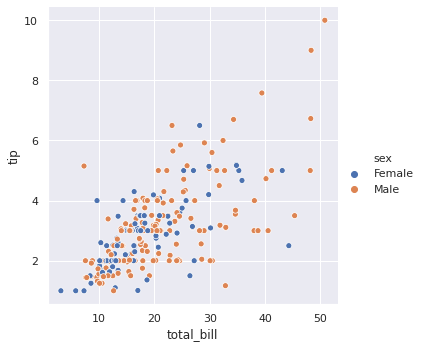

In [ ]:
# 除了畫出雙變數的散點圖外，還可以利用顏色來增加一個維度將點分離開
sns.relplot(data=tips, x="total_bill", y="tip", hue="sex", );

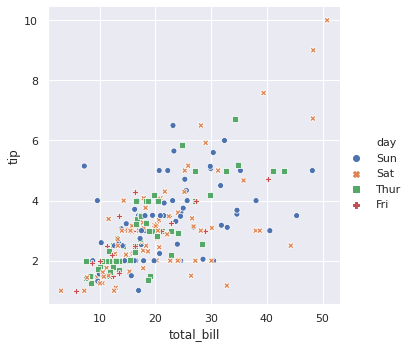

In [ ]:
# 為了強調資料之間的差異性，除了顏色也可以使用圖形的不同來分類資料點（顏色和形狀互相獨立）
sns.relplot(data=tips, x="total_bill", y="tip", hue="day", style="day");

### **3.7 分類散佈圖**
##### 主要用於瞭解名目資料與數值資料的關係
##### 可以使用兩種方法來畫出不同資料的分類情況。第一種是每個類別分佈在對應的橫軸座標上(僅簡單分類)，第二種則是為了展示出資料密度的分佈從而將資料產生少量抖動進行視覺化的方法。
####這裡要使用catplot()函數，了解不同資料的分類情況

     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]


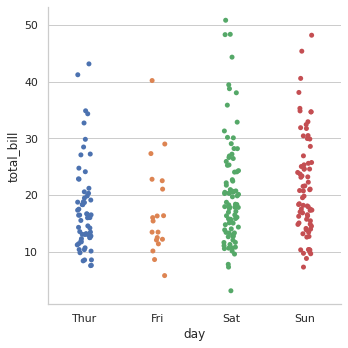

In [ ]:
tips = sns.load_dataset("tips")  # seaborn的內建tips(小費)資料集
print(tips)
sns.catplot(x="day", y="total_bill", jitter = True, data=tips)  # 透過抖動來展示出資料分佈，另外也能避免點跟點重疊

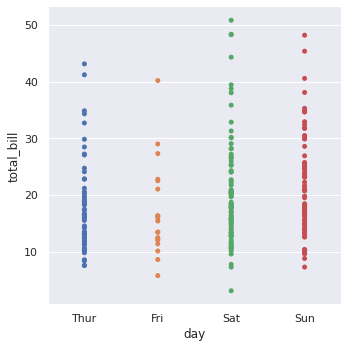

In [ ]:
# 若不使用抖動的話
sns.catplot(x="day", y="total_bill", jitter = False, data=tips) 

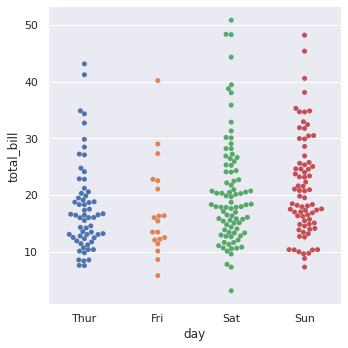

In [ ]:
# 可以使用kind="swarm"方法來使得圖形分佈均勻
sns.catplot(x="day", y="total_bill", kind="swarm", data=tips)  

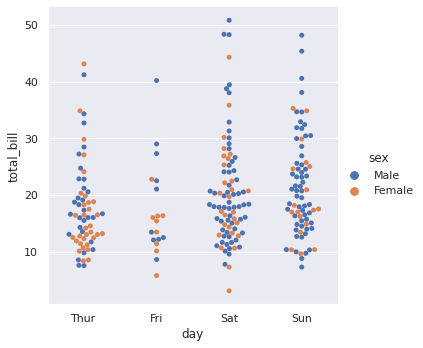

In [ ]:
# 另外也能夠使用hue參數來做更細部的劃分
sns.catplot(x="day", y="total_bill", kind="swarm", data=tips, hue="sex")  

### **3.7 分類分佈圖**

####當資料增加，分類資料的離散圖更為複雜，這時候需要對每類資料進行分佈圖的統計。

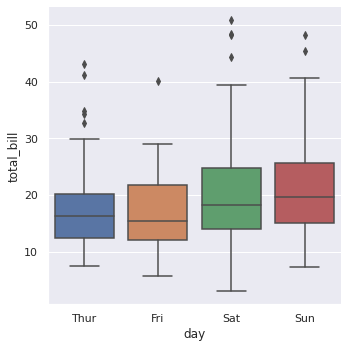

In [ ]:
# kind="box"箱形圖或是所謂的盒鬚圖就能了解四分位距、全距、極端值的數值位置
sns.catplot(x="day", y="total_bill", kind="box", data=tips);

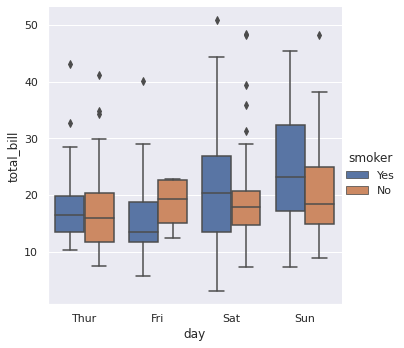

In [ ]:
# 使用hue參數來做更細部的劃分
sns.catplot(x="day", y="total_bill", hue="smoker", kind="box", data=tips);

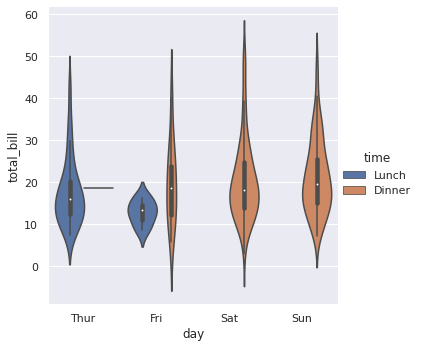

In [ ]:
# 小提琴圖事實上是密度圖和箱型圖的結合
# 分別表示箱型圖的含義和任意位置的概練密度
sns.catplot(x="day", y="total_bill", hue="time",kind="violin", data=tips);

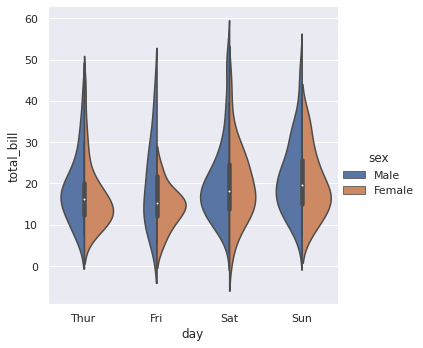

In [ ]:
# 當hue參數只有兩個級別時，也可以“拆分”小提琴，這樣可以更有效地利用空間
sns.catplot(x="day", y="total_bill", hue="sex",kind="violin", split=True, data=tips);

### **3.8 線性模型**
##### 主要用regplot()進行畫圖，這個函數繪製兩個變數的散點圖，x和y，然後擬合回歸模型並繪製得到的回歸直線和該回歸一個95％置信區間。
####最後就是可以做線性的迴歸模型


     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]


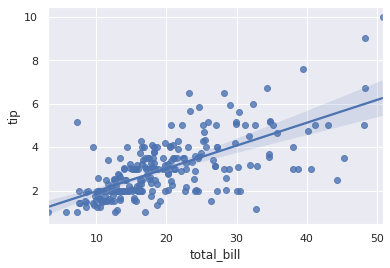

In [ ]:
sns.set_style('darkgrid')
print(tips)
sns.regplot(x="total_bill", y="tip", data=tips);

### **3.9 (Extra.)記數直方圖**

####使用直方圖顯示每個類別中觀測值的數量

In [ ]:
titanic = sns.load_dataset("titanic")  # seaborn的內建titanic(鐵達尼號事件)資料集
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


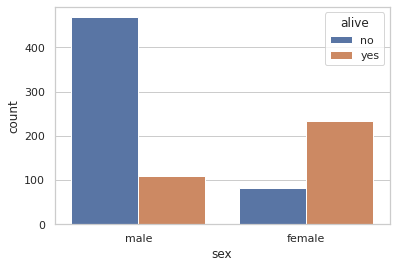

In [ ]:
sns.countplot(x="sex", hue = 'alive', data=titanic)  # 直向

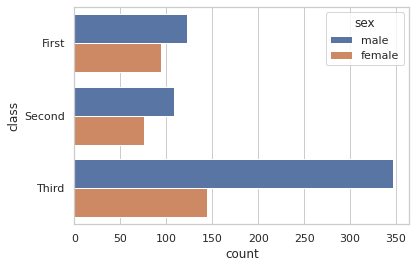

In [ ]:
sns.countplot(y="class", hue = 'sex', data=titanic)  # 橫向
# 參考資訊：https://www.bookstack.cn/read/seaborn-0.9/docs-21.md